# Logistic Regression Example
## From Scratch

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
# now in sklearn.model_selection
from sklearn.cross_validation import train_test_split

from sklearn import datasets
import numpy as np

/Users/bricerandolph/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print('Label counts in y:', np.bincount(y))
print('Label counts in y train:', np.bincount(y_train))
print('Label counts in y test:', np.bincount(y_test))


#loaded StandardScalar class from preprocessing module and initialized new SS object
# use fit method to calculate sample means and std for scaling
# use transform to center and scale
#NOTE: used the same scaling parameters to standardize the test set as the training set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#One vs Rest method allows support of multiclass classification

('Label counts in y:', array([50, 50, 50]))
('Label counts in y train:', array([35, 35, 35]))
('Label counts in y test:', array([15, 15, 15]))


In [8]:
import PlotDecisionRegions 
import LogisticRegressionGD as LRGD

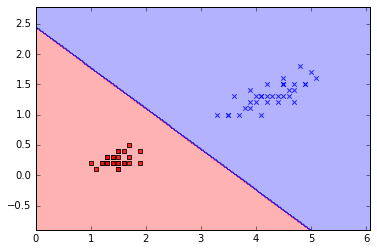

In [10]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LRGD.LogisticRegressionGD(eta=0.05, n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
PlotDecisionRegions.plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier = lrgd)


# Logistic Regression Example
## Using scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

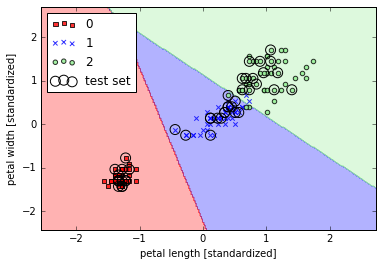

In [14]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
PlotDecisionRegions.plot_decision_regions(X=X_combined_std, y=y_combined, classifier = lr, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [17]:
#Example class probabilities
lr.predict_proba(X_test_std[:3, :])


array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [21]:
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])

# Regularization 

In [22]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)


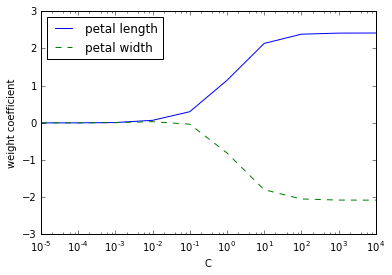

In [24]:
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')